In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pg_df=pd.read_csv(r"C:\Users\apple\Desktop\Machine Learning\ML Assignment\Peng Ass\penguins_size.csv")

In [31]:
pg_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [30]:
pg_df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [20]:
mydf=pd.DataFrame(pg_df[['flipper_length_mm','culmen_depth_mm','culmen_length_mm','body_mass_g','species']])

In [18]:
mydf

,flipper_length_mm,species
0,181.0,Adelie
1,186.0,Adelie
2,195.0,Adelie
3,NaN,Adelie
4,193.0,Adelie
...,...,...
339,NaN,Gentoo
340,215.0,Gentoo
341,222.0,Gentoo
342,212.0,Gentoo


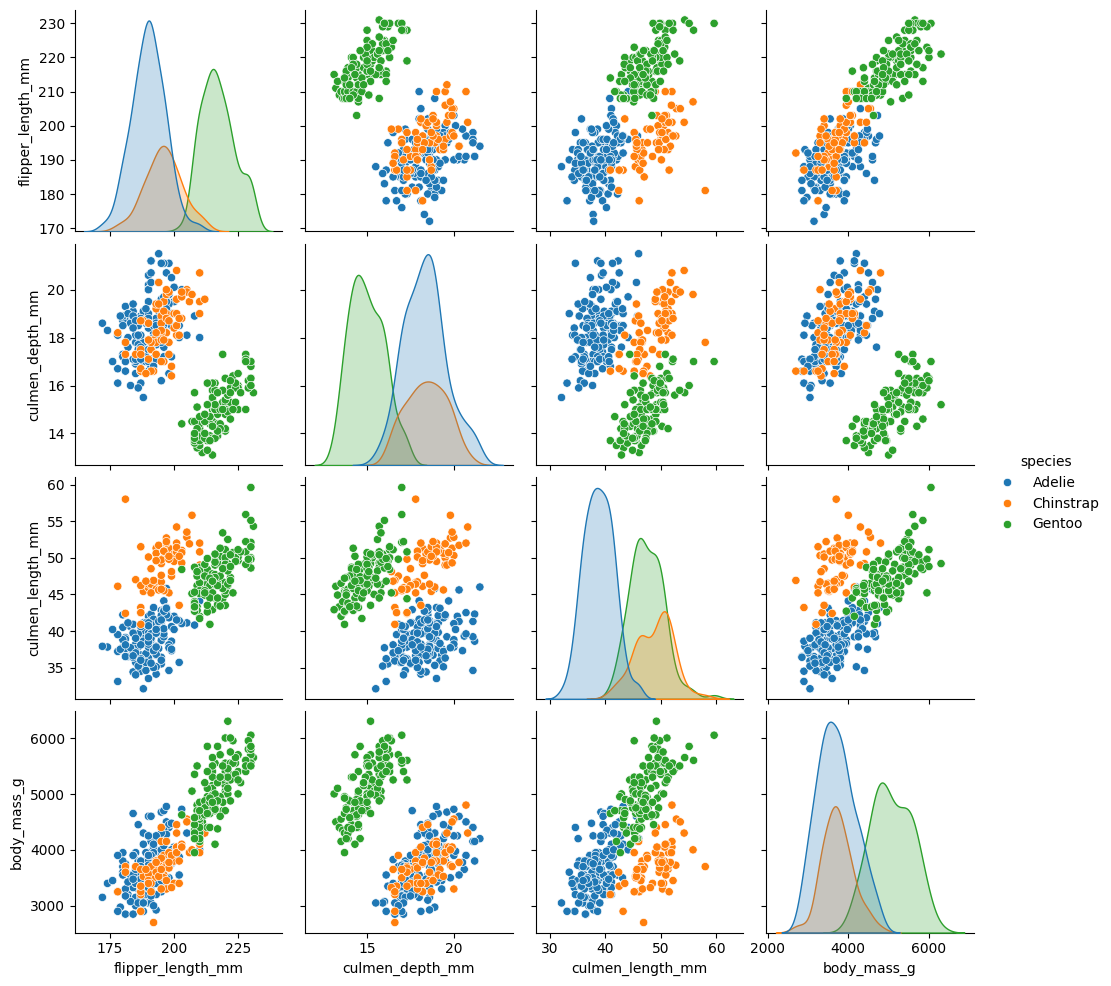

In [21]:
sns.pairplot(mydf,hue='species')

In [25]:
X = pg_df[['flipper_length_mm','culmen_depth_mm','culmen_length_mm','body_mass_g']]
y = pg_df['species']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train,y_train)

y_test_pred = classifier.predict(X_test)

print(metrics.accuracy_score(y_test,y_test_pred))

0.9883720930232558


In [28]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        42
   Chinstrap       1.00      0.93      0.96        14
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.98        86
weighted avg       0.99      0.99      0.99        86



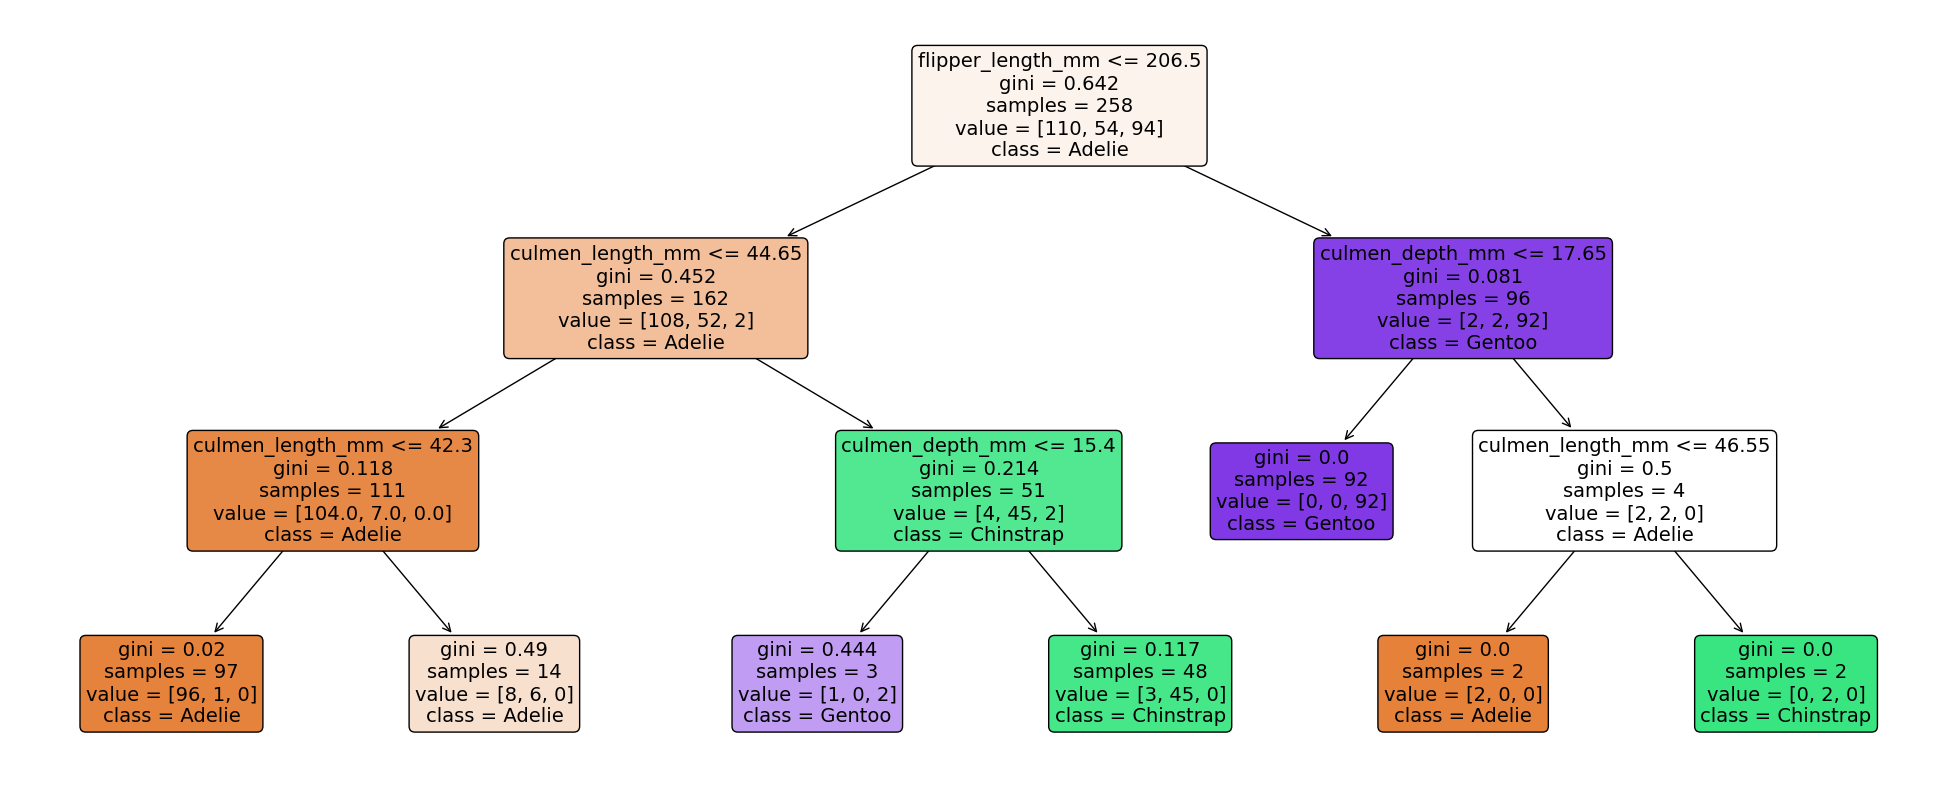

In [29]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))

f = plot_tree(classifier, 
              feature_names = list(X_train.columns), 
              class_names = list(classifier.classes_), 
              filled = True, 
              rounded = True, 
              fontsize = 14
             )

plt.show()

In [32]:
mydfislnd=pd.DataFrame(pg_df[['flipper_length_mm','culmen_depth_mm','culmen_length_mm','body_mass_g','island']])

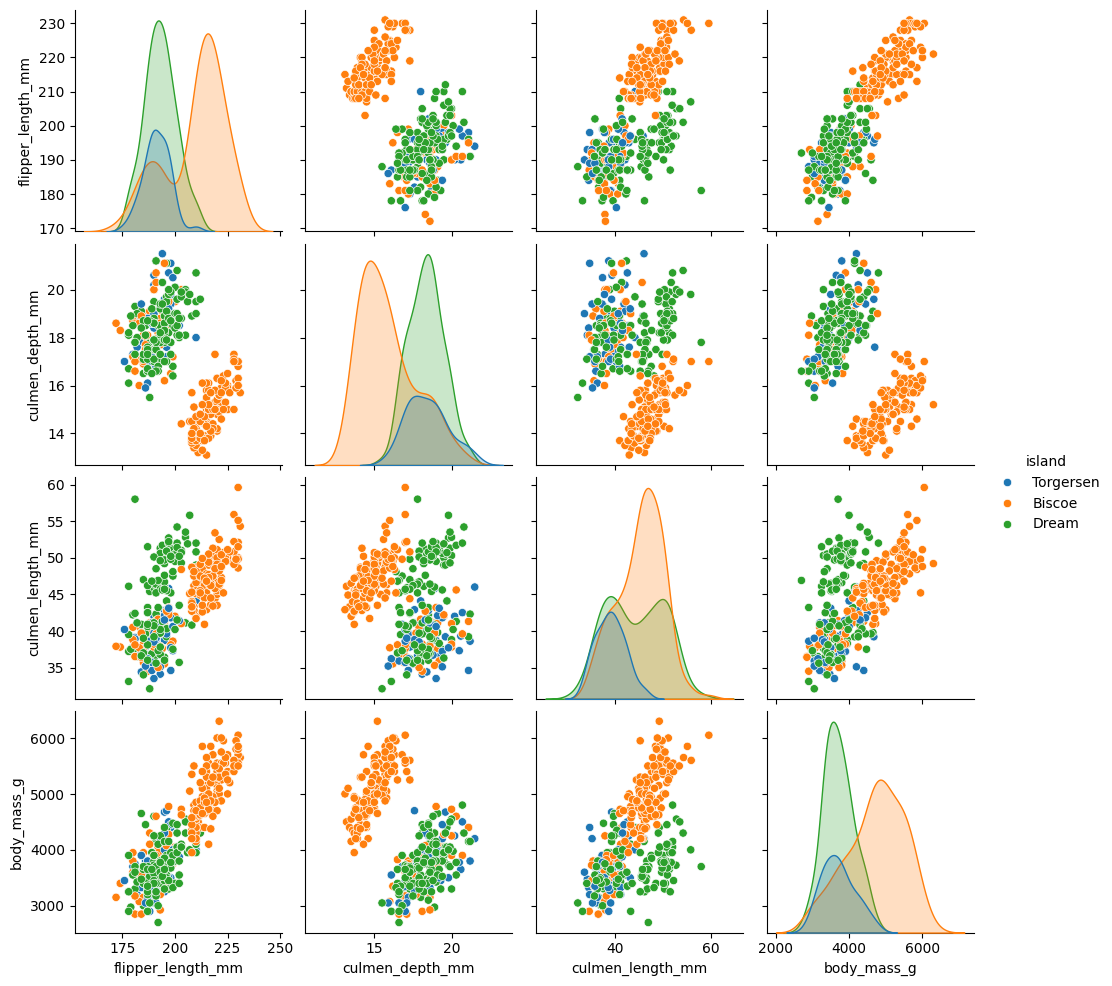

In [33]:
sns.pairplot(mydfislnd,hue='island')

In [35]:
numdf=pd.DataFrame(pg_df[['flipper_length_mm','culmen_depth_mm','culmen_length_mm','body_mass_g']])

cf=numdf.corr()

In [36]:
maxcf=cf.max()
maxcfts=cf.idxmax()

In [37]:
print(maxcfts[0],maxcfts[1])

flipper_length_mm culmen_depth_mm


C:\Users\apple\AppData\Local\Temp\ipykernel_32\1662855421.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(maxcfts[0],maxcfts[1])


In [41]:
grp=pg_df.groupby('island').filter(pg_df['species']='Adelie')



In [43]:
grp.first()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
Chinstrap,Dream,46.5,17.9,192.0,3500.0,FEMALE
Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE


In [47]:
pg_df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [54]:
pg_df.loc[(pg_df['flipper_length_mm']>=210) & (pg_df['flipper_length_mm']<=230)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,MALE
189,Chinstrap,Dream,52.0,20.7,210.0,4800.0,MALE
192,Chinstrap,Dream,49.0,19.5,210.0,3950.0,MALE
199,Chinstrap,Dream,49.0,19.6,212.0,4300.0,MALE
218,Chinstrap,Dream,50.8,19.0,210.0,4100.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [61]:
grpd=pg_df.loc[pg_df['species'].isin(['Adelie'])].groupby('island').count()

In [63]:
grpd

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
island,,,,,,
Biscoe,44,44,44,44,44,44
Dream,56,56,56,56,56,55
Torgersen,52,51,51,51,51,47
